# Name: Prasad Sanjay Khalkar

# Roll No: 33138

# TE-09 L-09

# Problem Statement:

### Download temperature data from the link below.
### https://www.kaggle.com/venky73/temperatures-of-india?select=temperatures.csv
### This data consists of temperatures of INDIA averaging the temperatures of all places
### monthwise. Temperatures values are recorded in CELSIUS
### A. Apply Linear Regression using a suitable library function and predict the Month-wise
### temperature.
### B. Assess the performance of regression models using MSE, MAE and R-Square metrics
### C. Visualize a simple regression model.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
df = pd.read_csv("/home/prasadkhalkar/Desktop/ML/Datasets/temperatures.csv")
dfCopy = df.copy()
dfCopy

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [41]:
dfCopy.shape

(117, 18)

In [42]:
dfCopy.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


## Regression for September

### Splitting the data into train and test 

In [43]:
x = dfCopy[['YEAR']]
y = dfCopy[['SEP']]

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [45]:
x_train

,YEAR
33,1934
59,1960
92,1993
42,1943
10,1911
...,...
9,1910
72,1973
12,1913
107,2008


In [46]:
x_test

,YEAR
69,1970
46,1947
58,1959
114,2015
73,1974
98,1999
31,1932
53,1954
65,1966
96,1997


### Train the model 

In [47]:
lr = LinearRegression()

In [48]:
model_sep = lr.fit(x_train,y_train)

In [49]:
b0 = model_sep.intercept_
b1 = model_sep.coef_

In [50]:
print(b1,b0)

[[0.0102336]] [10.42872908]


### Prediction 

In [51]:
prediction = model_sep.predict(x_test)

In [52]:
dataFrame = pd.DataFrame(x_test)

In [53]:
dataFrame['Actual_temp'] = y_test
dataFrame['Predicted_temp'] = prediction

In [54]:
dataFrame

,YEAR,Actual_temp,Predicted_temp
69,1970,30.41,30.588919
46,1947,29.70,30.353546
58,1959,30.39,30.476350
114,2015,31.55,31.049431
73,1974,30.87,30.629854
98,1999,31.22,30.885694
31,1932,30.83,30.200042
53,1954,29.87,30.425182
65,1966,30.25,30.547985
96,1997,31.11,30.865226


### Errors

In [55]:
MSE = mean_squared_error(y_test,prediction)
MAE = mean_absolute_error(y_test,prediction)
RSE = r2_score(y_test,prediction)

In [56]:
print('Mean Squared Error = %.4f'%MSE)
print('Mean Absolute Error = %.4f'%MAE)
print('RSE = %.4f'%RSE)

Mean Squared Error = 0.1322
Mean Absolute Error = 0.2733
RSE = 0.4542


### Plotting Line

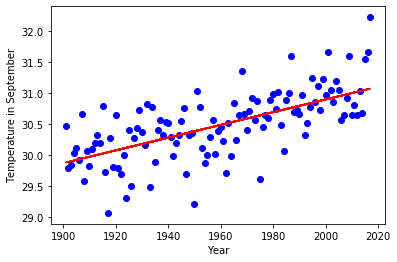

In [57]:
plt.scatter(dfCopy['YEAR'],dfCopy['SEP'],c='blue')
plt.xlabel('Year')
plt.ylabel('Temperature in September')
plt.plot(x_train,b0+b1*x_train,c='red')
plt.show()

## Regression for Annual Temperature

### Splitting into train and test

In [58]:
y2 = dfCopy[['ANNUAL']]

In [59]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y2,test_size=0.25,random_state=1)

### Train the model

In [60]:
model_annual = lr.fit(x2_train,y2_train)

In [61]:
b0 = model_annual.intercept_
b1 = model_annual.coef_

In [62]:
print(b0,b1)

[2.9609047] [[0.0134026]]


### Prediction

In [63]:
prediction = model_annual.predict(x2_test)

In [64]:
dataFrame = pd.DataFrame(x2_test)

In [65]:
dataFrame['Actual_temp'] = y2_test
dataFrame['Predicted_temp'] = prediction

In [66]:
dataFrame

,YEAR,Actual_temp,Predicted_temp
69,1970,29.47,29.364036
46,1947,28.84,29.055776
58,1959,29.02,29.216607
114,2015,29.90,29.967153
73,1974,29.26,29.417646
98,1999,29.81,29.752711
31,1932,29.09,28.854737
53,1954,28.92,29.149594
65,1966,29.41,29.310425
96,1997,29.05,29.725906


### Errors

In [67]:
MSE = mean_squared_error(y2_test,prediction)
MAE = mean_absolute_error(y2_test,prediction)
RSE = r2_score(y2_test,prediction)

In [68]:
print('Mean Squared Error = %.4f'%MSE)
print('Mean Absolute Error = %.4f'%MAE)
print('RSE = %.4f'%RSE)

Mean Squared Error = 0.0784
Mean Absolute Error = 0.2170
RSE = 0.6167


### Plotting line 

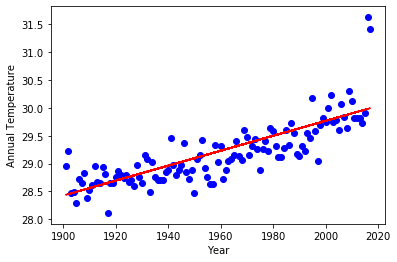

In [70]:
plt.scatter(dfCopy['YEAR'],dfCopy['ANNUAL'],c='blue')
plt.xlabel('Year')
plt.ylabel('Annual Temperature')
plt.plot(x_train,b0+b1*x_train,c='red')
plt.show()